In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
color_pal = sns.color_palette()


from sklearn.base import clone
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


## Import Data Files for Analysis

In [4]:
temperature_vic = pd.read_csv("C:/Users/aryan2/Assessment Data/temperature_vic.csv")
temperature_qld = pd.read_csv("C:/Users/aryan2/Assessment Data/temperature_qld.csv")
temperature_sa = pd.read_csv("C:/Users/aryan2/Assessment Data/temperature_sa.csv")
forecastdemand_vic = pd.read_csv("C:/Users/aryan2/Assessment Data/forecastdemand_vic.csv")
forecastdemand_qld = pd.read_csv("C:/Users/aryan2/Assessment Data/forecastdemand_qld.csv")
forecastdemand_sa = pd.read_csv("C:/Users/aryan2/Assessment Data/forecastdemand_sa.csv")
totaldemand_vic = pd.read_csv("C:/Users/aryan2/Assessment Data/totaldemand_vic.csv")
totaldemand_qld = pd.read_csv("C:/Users/aryan2/Assessment Data/totaldemand_qld.csv")
totaldemand_sa = pd.read_csv("C:/Users/aryan2/Assessment Data/totaldemand_sa.csv")


## Inspect and Clean Data

In [5]:
# For demand_vic
total_records_demand_vic = len(forecastdemand_vic)
duplicate_count_demand_vic = forecastdemand_vic.duplicated('DATETIME').sum()
print("Duplicate count in demand_vic = {} out of {} records".format(duplicate_count_demand_vic, total_records_demand_vic))

# For temperature_vic
total_records_temp_vic = len(temperature_vic)
duplicate_count_temp_vic = temperature_vic.duplicated('DATETIME').sum()
print("Duplicate count in temperature_vic = {} out of {} records".format(duplicate_count_temp_vic, total_records_temp_vic))

# For totaldemand_vic
total_records_totaldemand_vic = len(totaldemand_vic)
duplicate_count_totaldemand_vic = totaldemand_vic.duplicated('DATETIME').sum()
print("Duplicate count in totaldemand_vic = {} out of {} records".format(duplicate_count_totaldemand_vic, total_records_totaldemand_vic))



Duplicate count in demand_vic = 4021759 out of 4095592 records
Duplicate count in temperature_vic = 0 out of 141681 records
Duplicate count in totaldemand_vic = 0 out of 196513 records


In [6]:
# For demand_sa
total_records_demand_sa = len(forecastdemand_sa)
duplicate_count_demand_sa = forecastdemand_sa.duplicated('DATETIME').sum()
print("Duplicate count in demand_sa = {} out of {} records".format(duplicate_count_demand_sa, total_records_demand_sa))

# For temperature_sa
total_records_temp_sa = len(temperature_sa)
duplicate_count_temp_sa = temperature_sa.duplicated('DATETIME').sum()
print("Duplicate count in temperature_sa = {} out of {} records".format(duplicate_count_temp_sa, total_records_temp_sa))

# For totaldemand_sa
total_records_totaldemand_sa = len(totaldemand_sa)
duplicate_count_totaldemand_sa = totaldemand_sa.duplicated('DATETIME').sum()
print("Duplicate count in totaldemand_sa = {} out of {} records".format(duplicate_count_totaldemand_sa, total_records_totaldemand_sa))


Duplicate count in demand_sa = 4021759 out of 4095592 records
Duplicate count in temperature_sa = 0 out of 208085 records
Duplicate count in totaldemand_sa = 0 out of 196512 records


In [7]:
# For demand_qld
total_records_demand_qld = len(forecastdemand_qld)
duplicate_count_demand_qld = forecastdemand_qld.duplicated('DATETIME').sum()
print("Duplicate count in demand_qld = {} out of {} records".format(duplicate_count_demand_qld, total_records_demand_qld))

# For temperature_qld
total_records_temp_qld = len(temperature_qld)
duplicate_count_temp_qld = temperature_qld.duplicated('DATETIME').sum()
print("Duplicate count in temperature_qld = {} out of {} records".format(duplicate_count_temp_qld, total_records_temp_qld))

# For totaldemand_qld
total_records_totaldemand_qld = len(totaldemand_qld)
duplicate_count_totaldemand_qld = totaldemand_qld.duplicated('DATETIME').sum()
print("Duplicate count in totaldemand_qld = {} out of {} records".format(duplicate_count_totaldemand_qld, total_records_totaldemand_qld))


Duplicate count in demand_qld = 4021759 out of 4095592 records
Duplicate count in temperature_qld = 0 out of 208085 records
Duplicate count in totaldemand_qld = 0 out of 196513 records


# Remove Duplicates

In [94]:
# Remove duplicates from forecastdemand_sa
forecastdemand_sa_no_duplicates = forecastdemand_sa.drop_duplicates(subset='DATETIME', keep='last')

# Extract duplicates from forecastdemand_sa
duplicates_forecastdemand_sa = forecastdemand_sa[~forecastdemand_sa.index.isin(forecastdemand_sa_no_duplicates.index)]

# Save duplicates to a CSV file
duplicates_forecastdemand_sa.to_csv("forecastdemand_sa_duplicates.csv", index=False)

# Verify that duplicates are removed from forecastdemand_sa
print("Original forecastdemand_sa shape:", forecastdemand_sa.shape)
print("forecastdemand_sa shape after removing duplicates:", forecastdemand_sa_no_duplicates.shape)


Original forecastdemand_sa shape: (4095592, 6)
forecastdemand_sa shape after removing duplicates: (73833, 6)


In [95]:
# Remove duplicates from forecastdemand_qld
forecastdemand_qld_no_duplicates = forecastdemand_qld.drop_duplicates(subset='DATETIME', keep='last')

# Extract duplicates from forecastdemand_qld
duplicates_forecastdemand_qld = forecastdemand_qld[~forecastdemand_qld.index.isin(forecastdemand_qld_no_duplicates.index)]

# Save duplicates to a CSV file
duplicates_forecastdemand_qld.to_csv("forecastdemand_qld_duplicates.csv", index=False)

# Verify that duplicates are removed from forecastdemand_qld
print("Original forecastdemand_qld shape:", forecastdemand_qld.shape)
print("forecastdemand_qld shape after removing duplicates:", forecastdemand_qld_no_duplicates.shape)


Original forecastdemand_qld shape: (73833, 6)
forecastdemand_qld shape after removing duplicates: (73833, 6)


In [96]:
# Remove duplicates from forecastdemand_vic
forecastdemand_vic_no_duplicates = forecastdemand_vic.drop_duplicates(subset='DATETIME', keep='last')

# Extract duplicates from forecastdemand_qld
duplicates_forecastdemand_vic = forecastdemand_vic[~forecastdemand_vic.index.isin(forecastdemand_vic_no_duplicates.index)]

# Save duplicates to a CSV file
duplicates_forecastdemand_vic.to_csv("forecastdemand_vic_duplicates.csv", index=False)

# Verify that duplicates are removed from forecastdemand_qld
print("Original forecastdemand_vic shape:", forecastdemand_vic.shape)
print("forecastdemand_vic shape after removing duplicates:", forecastdemand_vic_no_duplicates.shape)


Original forecastdemand_vic shape: (73833, 6)
forecastdemand_vic shape after removing duplicates: (73833, 6)


## Copy the remove duplicate values list back to the master lists

In [97]:
forecastdemand_qld = forecastdemand_qld_no_duplicates

In [98]:
forecastdemand_qld.describe()

,PREDISPATCHSEQNO,PERIODID,FORECASTDEMAND,DATETIME
count,7.383300e+04,73833.000000,73833.000000,73833
mean,2.018690e+09,1.021765,6212.168522,2019-02-09 02:00:00
min,2.016123e+09,1.000000,3764.770000,2017-01-01 00:00:00
25%,2.018012e+09,1.000000,5505.050000,2018-01-20 13:00:00
50%,2.019021e+09,1.000000,6102.770000,2019-02-09 02:00:00
75%,2.020023e+09,1.000000,6815.450000,2020-02-28 15:00:00
max,2.021032e+09,57.000000,9964.840000,2021-03-19 04:00:00
std,1.214770e+06,0.902165,896.399377,NaN


In [99]:
forecastdemand_vic = forecastdemand_vic_no_duplicates

In [100]:
forecastdemand_vic.describe()

,PREDISPATCHSEQNO,PERIODID,FORECASTDEMAND,DATETIME
count,7.383300e+04,73833.000000,73833.000000,73833
mean,2.018690e+09,1.021765,4889.051609,2019-02-09 02:00:00
min,2.016123e+09,1.000000,2354.240000,2017-01-01 00:00:00
25%,2.018012e+09,1.000000,4238.980000,2018-01-20 13:00:00
50%,2.019021e+09,1.000000,4788.080000,2019-02-09 02:00:00
75%,2.020023e+09,1.000000,5398.370000,2020-02-28 15:00:00
max,2.021032e+09,57.000000,9580.890000,2021-03-19 04:00:00
std,1.214770e+06,0.902165,869.253987,NaN


In [101]:
forecastdemand_sa = forecastdemand_sa_no_duplicates

In [102]:
forecastdemand_sa.describe()

,PREDISPATCHSEQNO,PERIODID,FORECASTDEMAND,DATETIME
count,7.383300e+04,73833.000000,73833.000000,73833
mean,2.018690e+09,1.021765,1288.240923,2019-02-09 02:00:00
min,2.016123e+09,1.000000,290.200000,2017-01-01 00:00:00
25%,2.018012e+09,1.000000,1087.950000,2018-01-20 13:00:00
50%,2.019021e+09,1.000000,1253.220000,2019-02-09 02:00:00
75%,2.020023e+09,1.000000,1456.260000,2020-02-28 15:00:00
max,2.021032e+09,57.000000,3068.620000,2021-03-19 04:00:00
std,1.214770e+06,0.902165,332.309216,NaN


## Now the count of forecast demand records in all 3 x states are equal!!!

In [103]:

# Calculate minimum and maximum dates for each DataFrame
min_date_forecastdemand_sa = forecastdemand_sa['DATETIME'].min()
max_date_forecastdemand_sa = forecastdemand_sa['DATETIME'].max()

min_date_totaldemand_sa = totaldemand_sa['DATETIME'].min()
max_date_totaldemand_sa = totaldemand_sa['DATETIME'].max()

min_date_temperature_sa = temperature_sa['DATETIME'].min()
max_date_temperature_sa = temperature_sa['DATETIME'].max()

# Calculate average time between each time sample for each DataFrame
avg_time_diff_forecastdemand_sa = forecastdemand_sa['DATETIME'].diff().mean()
avg_time_diff_totaldemand_sa = totaldemand_sa['DATETIME'].diff().mean()
avg_time_diff_temperature_sa = temperature_sa['DATETIME'].diff().mean()

# Print the results
print("Forecast Demand SA:")
print("Minimum Date:", min_date_forecastdemand_sa)
print("Maximum Date:", max_date_forecastdemand_sa)
print("Average Time Between Samples:", avg_time_diff_forecastdemand_sa)

print("\nTotal Demand SA:")
print("Minimum Date:", min_date_totaldemand_sa)
print("Maximum Date:", max_date_totaldemand_sa)
print("Average Time Between Samples:", avg_time_diff_totaldemand_sa)

print("\nTemperature SA:")
print("Minimum Date:", min_date_temperature_sa)
print("Maximum Date:", max_date_temperature_sa)
print("Average Time Between Samples:", avg_time_diff_temperature_sa)


Forecast Demand SA:
Minimum Date: 2017-01-01 00:00:00
Maximum Date: 2021-03-19 04:00:00
Average Time Between Samples: 0 days 00:30:00

Total Demand SA:
Minimum Date: 2010-01-01 00:30:00
Maximum Date: 2021-03-18 00:00:00
Average Time Between Samples: 0 days 00:30:00

Temperature SA:
Minimum Date: 2010-01-01 00:00:00
Maximum Date: 2021-03-18 00:00:00
Average Time Between Samples: 0 days 00:28:19.898118067


## Further Data Table Exploration - Null Values, Time Differences

First Convert all the DateTime Columns

In [104]:
# SA
forecastdemand_sa['DATETIME'] = pd.to_datetime(forecastdemand_sa['DATETIME'])
totaldemand_sa['DATETIME'] = pd.to_datetime(totaldemand_sa['DATETIME'])
temperature_sa['DATETIME'] = pd.to_datetime(temperature_sa['DATETIME'])
temperature_sa['DATETIME'] = pd.to_datetime(temperature_sa['DATETIME'])

In [105]:
# QLD
forecastdemand_qld['DATETIME'] = pd.to_datetime(forecastdemand_qld['DATETIME'])
totaldemand_qld['DATETIME'] = pd.to_datetime(totaldemand_qld['DATETIME'])
temperature_qld['DATETIME'] = pd.to_datetime(temperature_qld['DATETIME'])
temperature_qld['DATETIME'] = pd.to_datetime(temperature_qld['DATETIME'], format='%d/%m/%Y %H:%M') # This date format is different


In [106]:
# VIC
forecastdemand_vic['DATETIME'] = pd.to_datetime(forecastdemand_vic['DATETIME'])
totaldemand_vic['DATETIME'] = pd.to_datetime(totaldemand_vic['DATETIME'])
temperature_vic['DATETIME'] = pd.to_datetime(temperature_vic['DATETIME'])
temperature_vic['DATETIME'] = pd.to_datetime(temperature_vic['DATETIME'])


Next Check the date ranges for each.

In [107]:
#SA

# Calculate minimum and maximum dates for each DataFrame
min_date_forecastdemand_sa = forecastdemand_sa['DATETIME'].min()
max_date_forecastdemand_sa = forecastdemand_sa['DATETIME'].max()

min_date_totaldemand_sa = totaldemand_sa['DATETIME'].min()
max_date_totaldemand_sa = totaldemand_sa['DATETIME'].max()

min_date_temperature_sa = temperature_sa['DATETIME'].min()
max_date_temperature_sa = temperature_sa['DATETIME'].max()

# Calculate average time between each time sample for each DataFrame
avg_time_diff_forecastdemand_sa = forecastdemand_sa['DATETIME'].diff().mean()
avg_time_diff_totaldemand_sa = totaldemand_sa['DATETIME'].diff().mean()
avg_time_diff_temperature_sa = temperature_sa['DATETIME'].diff().mean()

# Print the results
print("Forecast Demand sa:")
print("Minimum Date:", min_date_forecastdemand_sa)
print("Maximum Date:", max_date_forecastdemand_sa)
print("Average Time Between samples:", avg_time_diff_forecastdemand_sa)

print("\nTotal Demand sa:")
print("Minimum Date:", min_date_totaldemand_sa)
print("Maximum Date:", max_date_totaldemand_sa)
print("Average Time Between samples:", avg_time_diff_totaldemand_sa)

print("\nTemperature sa:")
print("Minimum Date:", min_date_temperature_sa)
print("Maximum Date:", max_date_temperature_sa)
print("Average Time Between samples:", avg_time_diff_temperature_sa)

Forecast Demand sa:
Minimum Date: 2017-01-01 00:00:00
Maximum Date: 2021-03-19 04:00:00
Average Time Between samples: 0 days 00:30:00

Total Demand sa:
Minimum Date: 2010-01-01 00:30:00
Maximum Date: 2021-03-18 00:00:00
Average Time Between samples: 0 days 00:30:00

Temperature sa:
Minimum Date: 2010-01-01 00:00:00
Maximum Date: 2021-03-18 00:00:00
Average Time Between samples: 0 days 00:28:19.898118067


In [108]:
# Check for null values in forecastdemand_sa
null_values_forecastdemand_sa = forecastdemand_sa.isnull().sum()
print("Null values in forecastdemand_sa:")
print(null_values_forecastdemand_sa)

# Check for null values in totaldemand_sa
null_values_totaldemand_sa = totaldemand_sa.isnull().sum()
print("\nNull values in totaldemand_sa:")
print(null_values_totaldemand_sa)

# Check for null values in temperature_sa
null_values_temperature_sa = temperature_sa.isnull().sum()
print("\nNull values in temperature_sa:")
print(null_values_temperature_sa)

Null values in forecastdemand_sa:
PREDISPATCHSEQNO    0
REGIONID            0
PERIODID            0
FORECASTDEMAND      0
LASTCHANGED         0
DATETIME            0
dtype: int64

Null values in totaldemand_sa:
DATETIME       0
TOTALDEMAND    0
REGIONID       0
dtype: int64

Null values in temperature_sa:
Unnamed: 0     0
LOCATION       0
DATETIME       0
TEMPERATURE    0
dtype: int64


In [109]:
#QLD

# Calculate minimum and maximum dates for each DataFrame
min_date_forecastdemand_qld = forecastdemand_qld['DATETIME'].min()
max_date_forecastdemand_qld = forecastdemand_qld['DATETIME'].max()

min_date_totaldemand_qld = totaldemand_qld['DATETIME'].min()
max_date_totaldemand_qld = totaldemand_qld['DATETIME'].max()

min_date_temperature_qld = temperature_qld['DATETIME'].min()
max_date_temperature_qld = temperature_qld['DATETIME'].max()

# Calculate average time between each time qldmple for each DataFrame
avg_time_diff_forecastdemand_qld = forecastdemand_qld['DATETIME'].diff().mean()
avg_time_diff_totaldemand_qld = totaldemand_qld['DATETIME'].diff().mean()
avg_time_diff_temperature_qld = temperature_qld['DATETIME'].diff().mean()

# Print the results
print("Forecast Demand qld:")
print("Minimum Date:", min_date_forecastdemand_qld)
print("Maximum Date:", max_date_forecastdemand_qld)
print("Average Time Between samples:", avg_time_diff_forecastdemand_qld)

print("\nTotal Demand qld:")
print("Minimum Date:", min_date_totaldemand_qld)
print("Maximum Date:", max_date_totaldemand_qld)
print("Average Time Between samples:", avg_time_diff_totaldemand_qld)

print("\nTemperature qld:")
print("Minimum Date:", min_date_temperature_qld)
print("Maximum Date:", max_date_temperature_qld)
print("Average Time Between samples:", avg_time_diff_temperature_qld)

Forecast Demand qld:
Minimum Date: 2017-01-01 00:00:00
Maximum Date: 2021-03-19 04:00:00
Average Time Between samples: 0 days 00:30:00

Total Demand qld:
Minimum Date: 2010-01-01 00:00:00
Maximum Date: 2021-03-18 00:00:00
Average Time Between samples: 0 days 00:30:00

Temperature qld:
Minimum Date: 2010-01-01 00:00:00
Maximum Date: 2021-03-18 00:00:00
Average Time Between samples: 0 days 00:28:19.898118067


In [110]:
# Check for null values in forecastdemand_qld
null_values_forecastdemand_qld = forecastdemand_qld.isnull().sum()
print("Null values in forecastdemand_qld:")
print(null_values_forecastdemand_qld)

# Check for null values in totaldemand_qld
null_values_totaldemand_qld = totaldemand_qld.isnull().sum()
print("\nNull values in totaldemand_qld:")
print(null_values_totaldemand_qld)

# Check for null values in temperature_qld
null_values_temperature_qld = temperature_qld.isnull().sum()
print("\nNull values in temperature_qld:")
print(null_values_temperature_qld)


Null values in forecastdemand_qld:
PREDISPATCHSEQNO    0
REGIONID            0
PERIODID            0
FORECASTDEMAND      0
LASTCHANGED         0
DATETIME            0
dtype: int64

Null values in totaldemand_qld:
DATETIME       0
TOTALDEMAND    0
REGIONID       0
dtype: int64

Null values in temperature_qld:
LOCATION       0
DATETIME       0
TEMPERATURE    0
dtype: int64


In [111]:
#VIC

# Calculate minimum and maximum dates for each DataFrame
min_date_forecastdemand_vic = forecastdemand_vic['DATETIME'].min()
max_date_forecastdemand_vic = forecastdemand_vic['DATETIME'].max()

min_date_totaldemand_vic = totaldemand_vic['DATETIME'].min()
max_date_totaldemand_vic = totaldemand_vic['DATETIME'].max()

min_date_temperature_vic = temperature_vic['DATETIME'].min()
max_date_temperature_vic = temperature_vic['DATETIME'].max()

# Calculate average time between each time vicmple for each DataFrame
avg_time_diff_forecastdemand_vic = forecastdemand_vic['DATETIME'].diff().mean()
avg_time_diff_totaldemand_vic = totaldemand_vic['DATETIME'].diff().mean()
avg_time_diff_temperature_vic = temperature_vic['DATETIME'].diff().mean()

# Print the results
print("Forecast Demand vic:")
print("Minimum Date:", min_date_forecastdemand_vic)
print("Maximum Date:", max_date_forecastdemand_vic)
print("Average Time Between samples:", avg_time_diff_forecastdemand_vic)

print("\nTotal Demand vic:")
print("Minimum Date:", min_date_totaldemand_vic)
print("Maximum Date:", max_date_totaldemand_vic)
print("Average Time Between samples:", avg_time_diff_totaldemand_vic)

print("\nTemperature vic:")
print("Minimum Date:", min_date_temperature_vic)
print("Maximum Date:", max_date_temperature_vic)
print("Average Time Between samples:", avg_time_diff_temperature_vic)

Forecast Demand vic:
Minimum Date: 2017-01-01 00:00:00
Maximum Date: 2021-03-19 04:00:00
Average Time Between samples: 0 days 00:30:00

Total Demand vic:
Minimum Date: 2010-01-01 00:00:00
Maximum Date: 2021-03-18 00:00:00
Average Time Between samples: 0 days 00:30:00

Temperature vic:
Minimum Date: 2013-05-31 15:00:00
Maximum Date: 2021-03-18 00:00:00
Average Time Between samples: 0 days 00:28:56.400338791


In [112]:
# Check for null values in forecastdemand_sa
null_values_forecastdemand_sa = forecastdemand_sa.isnull().sum()
print("Null values in forecastdemand_sa:")
print(null_values_forecastdemand_sa)

# Check for null values in totaldemand_sa
null_values_totaldemand_sa = totaldemand_sa.isnull().sum()
print("\nNull values in totaldemand_sa:")
print(null_values_totaldemand_sa)

# Check for null values in temperature_sa
null_values_temperature_sa = temperature_sa.isnull().sum()
print("\nNull values in temperature_sa:")
print(null_values_temperature_sa)

Null values in forecastdemand_sa:
PREDISPATCHSEQNO    0
REGIONID            0
PERIODID            0
FORECASTDEMAND      0
LASTCHANGED         0
DATETIME            0
dtype: int64

Null values in totaldemand_sa:
DATETIME       0
TOTALDEMAND    0
REGIONID       0
dtype: int64

Null values in temperature_sa:
Unnamed: 0     0
LOCATION       0
DATETIME       0
TEMPERATURE    0
dtype: int64


Note: results above confirm that average between each sample in each state is 30 minutes. This further confirms there are no duplicates.

## Explore Dataset - Plot a Month worth of Temperature Data

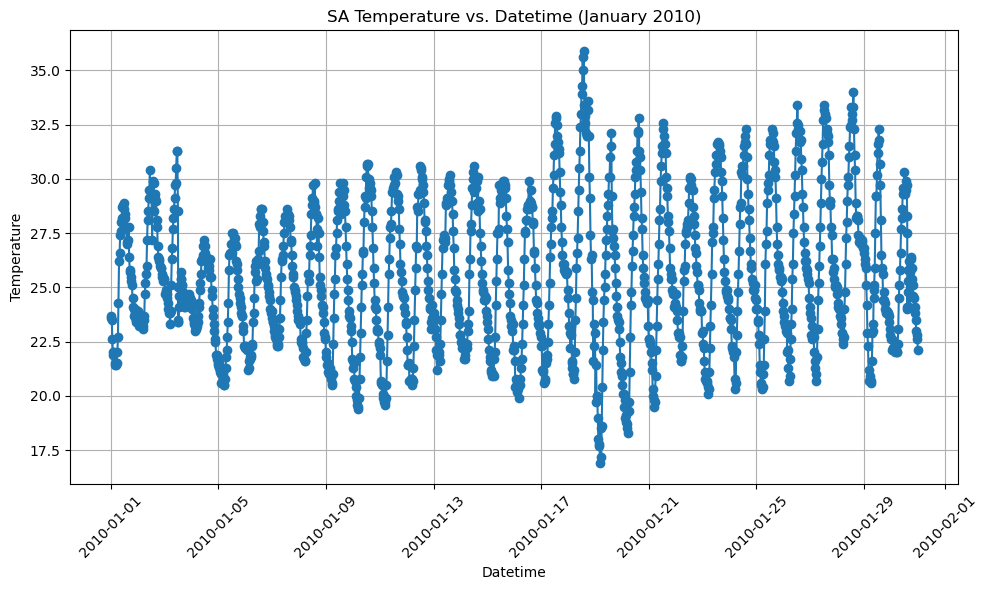

In [113]:
#SA

# Filter data for a single month
start_date = '2010-01-01'
end_date = '2010-01-31'
temperature_sa_single_month = temperature_sa[(temperature_sa['DATETIME'] >= start_date) & (temperature_sa['DATETIME'] <= end_date)]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(temperature_sa_single_month['DATETIME'], temperature_sa_single_month['TEMPERATURE'], marker='o', linestyle='-')
plt.title('SA Temperature vs. Datetime (January 2010)')
plt.xlabel('Datetime')
plt.ylabel('Temperature')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


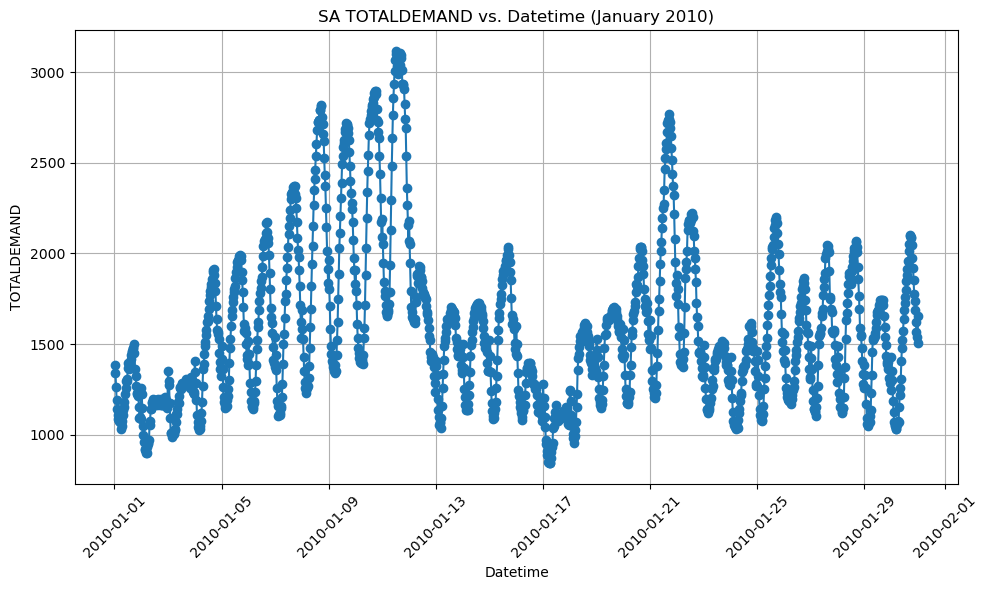

In [114]:
# Filter data for a single month
start_date = '2010-01-01'
end_date = '2010-01-31'
totaldemand_sa_single_month = totaldemand_sa[(totaldemand_sa['DATETIME'] >= start_date) & (totaldemand_sa['DATETIME'] <= end_date)]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(totaldemand_sa_single_month['DATETIME'], totaldemand_sa_single_month['TOTALDEMAND'], marker='o', linestyle='-')
plt.title('SA TOTALDEMAND vs. Datetime (January 2010)')
plt.xlabel('Datetime')
plt.ylabel('TOTALDEMAND')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


# Merge Tables

In [117]:
sa_df = pd.merge(temperature_sa, totaldemand_sa, on='DATETIME', how='inner')

# Merge merged_df with forecastdemand_sa on 'DATETIME'
sa_df = pd.merge(sa_df, forecastdemand_sa, on='DATETIME', how='inner')

# Minimum and maximum dates
min_date_sa = forecastdemand_sa['DATETIME'].min()
max_date_sa = forecastdemand_sa['DATETIME'].max()


# Check average time between each time sample
time_diff_sa = sa_df['DATETIME'].diff().mean()

print("Minimum Date:", min_date_sa)
print("Maximum Date:", max_date_sa)
print("Average Time Between Samples:", time_diff_sa)

# print(sa_df)

Minimum Date: 2017-01-01 00:00:00
Maximum Date: 2021-03-19 04:00:00
Average Time Between Samples: 0 days 00:30:00.878763222


In [118]:
# QLD
qld_df = pd.merge(temperature_qld, totaldemand_qld, on='DATETIME', how='inner')

# Merge merged_df with forecastdemand_sa on 'DATETIME'
qld_df = pd.merge(qld_df, forecastdemand_qld, on='DATETIME', how='inner')

time_diff_qld = qld_df['DATETIME'].diff().mean()

print("Minimum Date:", min_date)
print("Maximum Date:", max_date)
print("Average Time Between Samples:", time_diff_qld)

# print(qld_df)

Minimum Date: 2017-01-01 00:00:00
Maximum Date: 2021-03-19 04:00:00
Average Time Between Samples: 0 days 00:30:00.878763222


In [119]:
# VIC
vic_df = pd.merge(temperature_vic, totaldemand_vic, on='DATETIME', how='inner')

# Merge merged_df with forecastdemand_sa on 'DATETIME'
vic_df = pd.merge(vic_df, forecastdemand_vic, on='DATETIME', how='inner')

time_diff_vic = vic_df['DATETIME'].diff().mean()

print("Minimum Date:", min_date)
print("Maximum Date:", max_date)
print("Average Time Between Samples:", time_diff_vic)

# print(vic_df)

Minimum Date: 2017-01-01 00:00:00
Maximum Date: 2021-03-19 04:00:00
Average Time Between Samples: 0 days 00:30:00.244014857


Now all the tables have the same date range. - Jan 1, 2017 -> Mar 19, 2021

In [120]:
column_names = sa_df.columns.tolist()
print(column_names)

['Unnamed: 0', 'LOCATION', 'DATETIME', 'TEMPERATURE', 'TOTALDEMAND', 'REGIONID_x', 'PREDISPATCHSEQNO', 'REGIONID_y', 'PERIODID', 'FORECASTDEMAND', 'LASTCHANGED']


In [121]:
# Check for null or missing values
null_values = sa_df.isnull().any()

# Print columns with missing values
print("Columns with missing values:")
print(null_values[null_values])

# Count total missing values
total_missing = sa_df.isnull().sum().sum()
print("Total missing values:", total_missing)


Columns with missing values:
Series([], dtype: bool)
Total missing values: 0


In [122]:
# Calculate the correlation between TEMPERATURE and TOTALDEMAND
correlation = sa_df['TEMPERATURE'].corr(sa_df['TOTALDEMAND'])

print("Correlation between TEMPERATURE and TOTALDEMAND:", correlation)


Correlation between TEMPERATURE and TOTALDEMAND: -0.20371041032086135


In [123]:
# Calculate the correlation between FORECASTDEMAND and TOTALDEMAND
correlation = sa_df['FORECASTDEMAND'].corr(sa_df['TOTALDEMAND'])

print("Correlation between FORECASTDEMAND and TOTALDEMAND:", correlation)

Correlation between FORECASTDEMAND and TOTALDEMAND: 0.9933839706025311


In [124]:
print(sa_df.describe())

          Unnamed: 0                       DATETIME   TEMPERATURE  \
count   73741.000000                          73741  73741.000000   
mean   168431.557695  2019-02-08 09:30:04.759902720     20.851593   
min    128958.000000            2017-01-01 00:00:00      1.500000   
25%    148521.000000            2018-01-20 06:00:00     17.000000   
50%    168479.000000            2019-02-08 10:00:00     21.400000   
75%    188242.000000            2020-02-27 14:30:00     24.900000   
max    208084.000000            2021-03-18 00:00:00     40.600000   
std     22860.811574                            NaN      5.747716   

       TOTALDEMAND  PREDISPATCHSEQNO      PERIODID  FORECASTDEMAND  
count  73741.00000      7.374100e+04  73741.000000    73741.000000  
mean    1288.28930      2.018688e+09      1.000149     1288.347163  
min      284.51000      2.016123e+09      1.000000      290.200000  
25%     1086.79000      2.018012e+09      1.000000     1087.990000  
50%     1253.36000      2.019021e

# Further data exploration

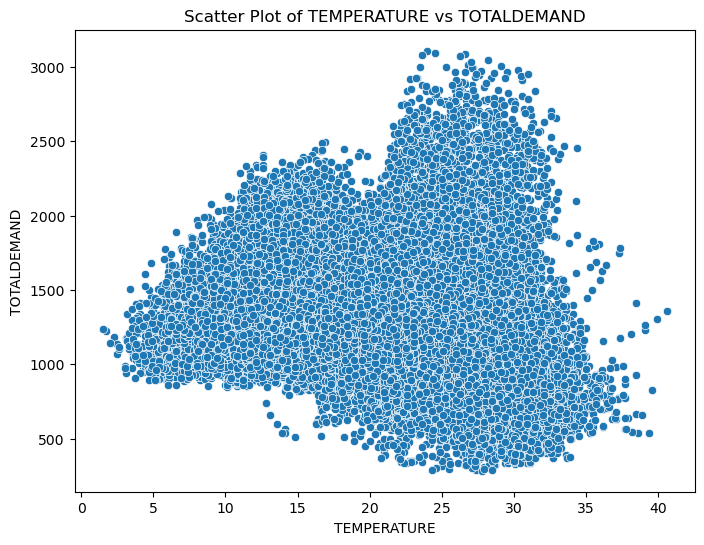

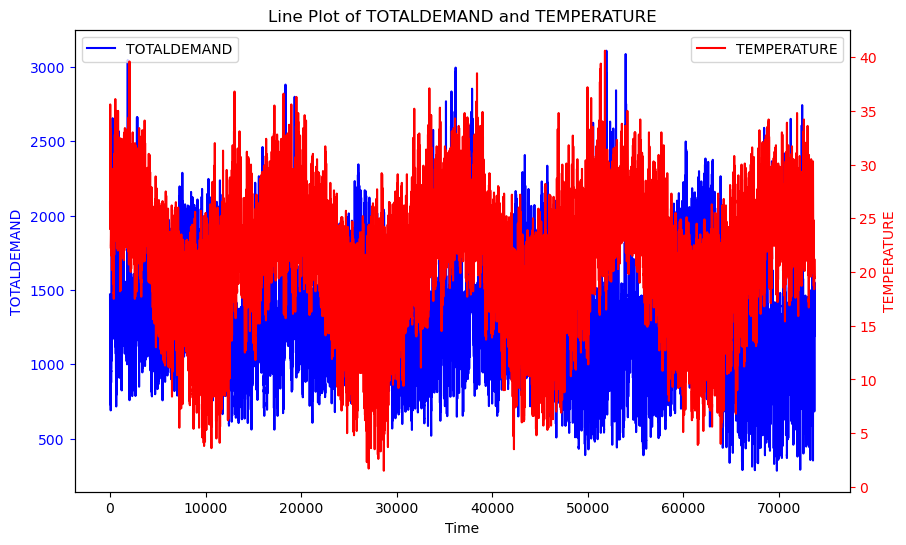

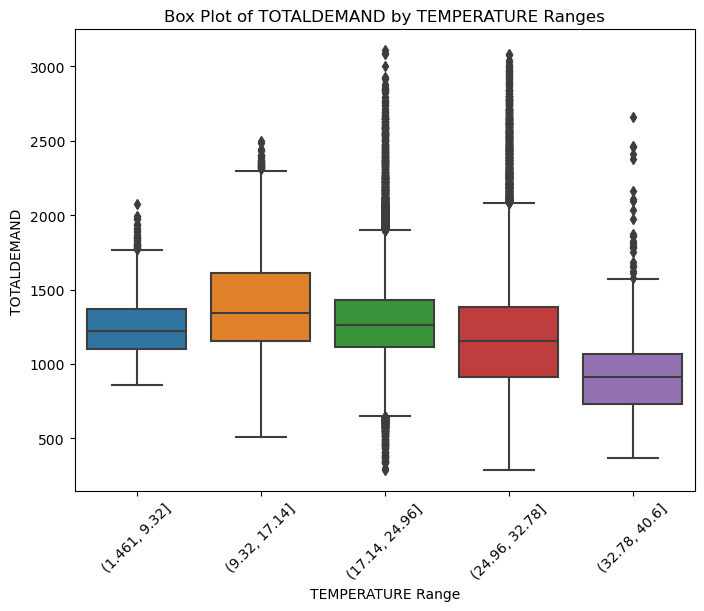

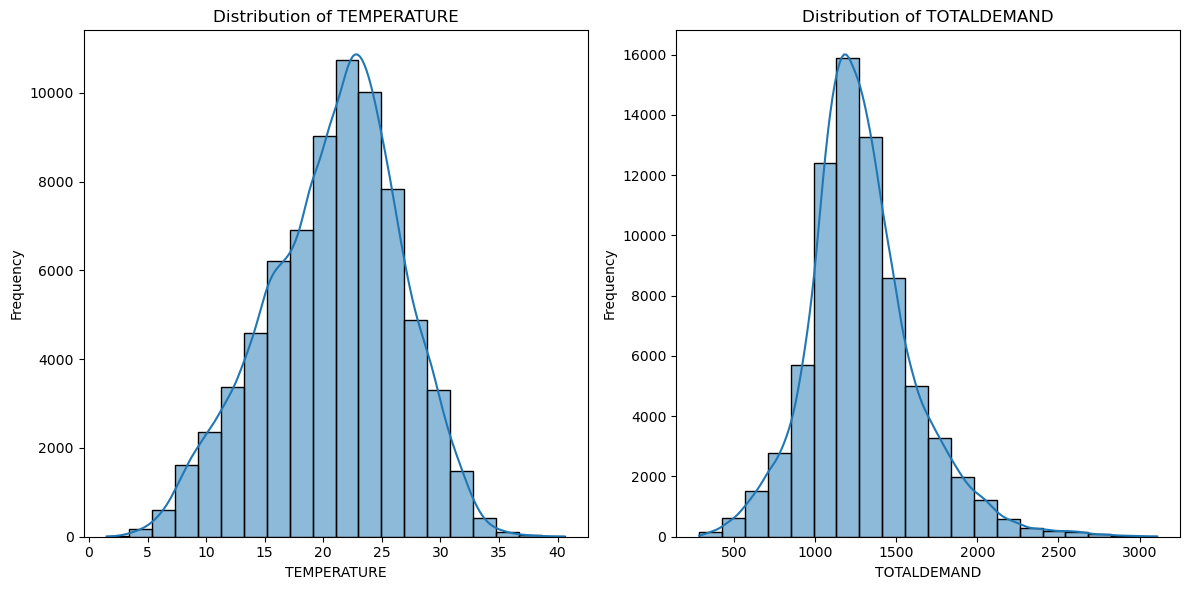

In [125]:

# Scatter Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='TEMPERATURE', y='TOTALDEMAND', data=sa_df)
plt.title('Scatter Plot of TEMPERATURE vs TOTALDEMAND')
plt.xlabel('TEMPERATURE')
plt.ylabel('TOTALDEMAND')
plt.show()

# Line Plot
# Create figure and axis objects
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot TOTALDEMAND on the primary y-axis
sns.lineplot(x=sa_df.index, y='TOTALDEMAND', data=sa_df, label='TOTALDEMAND', ax=ax1, color='b')
ax1.set_ylabel('TOTALDEMAND', color='b')
ax1.tick_params('y', colors='b')

# Create a secondary y-axis for TEMPERATURE
ax2 = ax1.twinx()
sns.lineplot(x=sa_df.index, y='TEMPERATURE', data=sa_df, label='TEMPERATURE', ax=ax2, color='r')
ax2.set_ylabel('TEMPERATURE', color='r')
ax2.tick_params('y', colors='r')

# Set titles and legend
plt.title('Line Plot of TOTALDEMAND and TEMPERATURE')
ax1.set_xlabel('Time')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

# Box Plot
plt.figure(figsize=(8, 6))
sns.boxplot(x=pd.cut(sa_df['TEMPERATURE'], bins=5), y='TOTALDEMAND', data=sa_df)
plt.title('Box Plot of TOTALDEMAND by TEMPERATURE Ranges')
plt.xlabel('TEMPERATURE Range')
plt.ylabel('TOTALDEMAND')
plt.xticks(rotation=45)
plt.show()

# Histogram
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(sa_df['TEMPERATURE'], bins=20, kde=True)
plt.title('Distribution of TEMPERATURE')
plt.xlabel('TEMPERATURE')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(sa_df['TOTALDEMAND'], bins=20, kde=True)
plt.title('Distribution of TOTALDEMAND')
plt.xlabel('TOTALDEMAND')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


## Further Plots

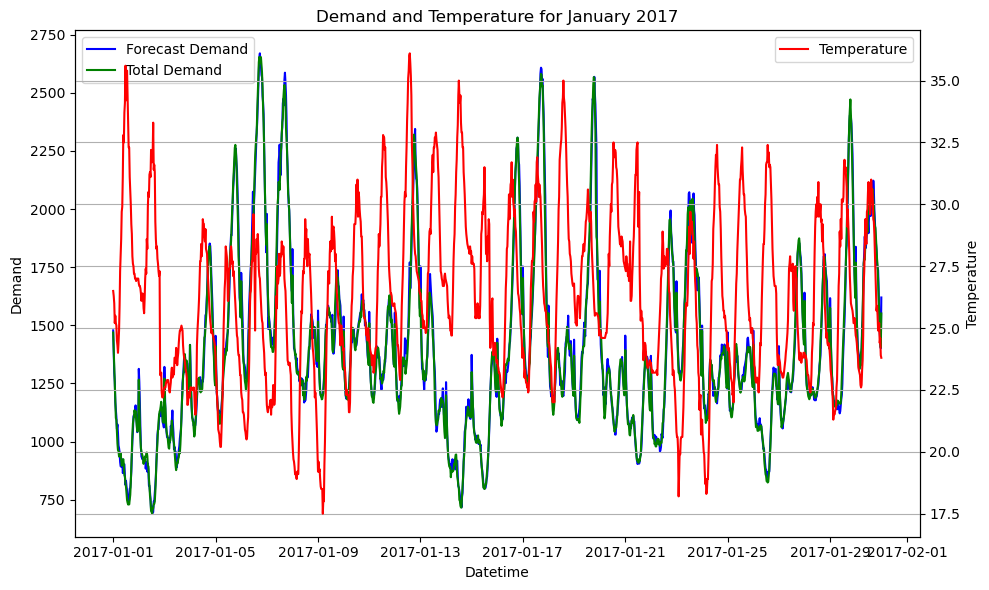

In [127]:
# Filter data for January 2017
january_2017_df = sa_df[(sa_df['DATETIME'] >= '2017-01-01') & (sa_df['DATETIME'] <= '2017-01-31')]

# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

# Primary y-axis (left)
ax1.plot(january_2017_df['DATETIME'], january_2017_df['FORECASTDEMAND'], label='Forecast Demand', color='blue')
ax1.plot(january_2017_df['DATETIME'], january_2017_df['TOTALDEMAND'], label='Total Demand', color='green')
ax1.set_xlabel('Datetime')
ax1.set_ylabel('Demand', color='black')
ax1.tick_params('y', colors='black')
ax1.legend(loc='upper left')

# Secondary y-axis (right) for temperature
ax2 = ax1.twinx()
ax2.plot(january_2017_df['DATETIME'], january_2017_df['TEMPERATURE'], label='Temperature', color='red')
ax2.set_ylabel('Temperature', color='black')
ax2.tick_params('y', colors='black')
ax2.legend(loc='upper right')

plt.title('Demand and Temperature for January 2017')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Add in additional features

In [189]:
# Define a function to map months to seasons in Australia
def get_season_australia(month):
    if 1 <= month <= 2 or month == 12:
        return 'Summer'
    elif 3 <= month <= 5:
        return 'Autumn'
    elif 6 <= month <= 8:
        return 'Winter'
    else:
        return 'Spring'

# Extract month from DATETIME column
sa_df['MONTH'] = sa_df['DATETIME'].dt.month
vic_df['MONTH'] = vic_df['DATETIME'].dt.month
qld_df['MONTH'] = qld_df['DATETIME'].dt.month

# Map months to seasons for Australia
sa_df['SEASON'] = sa_df['MONTH'].apply(get_season_australia)
vic_df['SEASON'] = vic_df['MONTH'].apply(get_season_australia)
qld_df['SEASON'] = qld_df['MONTH'].apply(get_season_australia)

# Drop the intermediate 'MONTH' column if not needed
sa_df.drop(columns=['MONTH'], inplace=True)
vic_df.drop(columns=['MONTH'], inplace=True)
qld_df.drop(columns=['MONTH'], inplace=True)


In [214]:
# Extract weekday from DATETIME column
sa_df['WEEKDAY'] = sa_df['DATETIME'].dt.weekday
qld_df['WEEKDAY'] = qld_df['DATETIME'].dt.weekday
vic_df['WEEKDAY'] = vic_df['DATETIME'].dt.weekday

# Print out a few rows to verify
print(sa_df.head())


   Unnamed: 0              LOCATION            DATETIME  TEMPERATURE  \
0      128958  Adelaide (Kent Town) 2017-01-01 00:00:00         26.5   
1      128959  Adelaide (Kent Town) 2017-01-01 00:30:00         26.3   
2      128960  Adelaide (Kent Town) 2017-01-01 01:00:00         26.0   
3      128961  Adelaide (Kent Town) 2017-01-01 01:30:00         25.2   
4      128962  Adelaide (Kent Town) 2017-01-01 02:00:00         25.5   

   TOTALDEMAND REGIONID_x  PREDISPATCHSEQNO REGIONID_y  PERIODID  \
0      1469.06        SA1        2016123140        SA1         1   
1      1395.21        SA1        2016123141        SA1         1   
2      1306.86        SA1        2016123142        SA1         1   
3      1239.58        SA1        2016123143        SA1         1   
4      1173.09        SA1        2016123144        SA1         1   

   FORECASTDEMAND  ... Cooling Heating  SEASON_INT  YEAR  DAY  HOUR  \
0         1478.40  ...     2.5     0.0           1  2017    1     0   
1         1394.1

In [260]:
#Add in is_weekend feature
sa_df['is_weekend'] = sa_df['DATETIME'].dt.dayofweek >= 5
qld_df['is_weekend'] = qld_df['DATETIME'].dt.dayofweek >= 5
vic_df['is_weekend'] = vic_df['DATETIME'].dt.dayofweek >= 5


In [130]:
# Extract unique years from DATETIME column
years = sa_df['DATETIME'].dt.year.unique()

# Print out the years
print("Years contained in sa_df:", years)


Years contained in sa_df: [2017 2018 2019 2020 2021]


In [162]:
import pandas as pd
import holidays

# Generate Australian public holidays for a specific year
year = years  # Specify the year for which you want to generate public holidays
australian_holidays = holidays.AU(years=year)

# Convert the holidays to a DataFrame
holiday_dates = [(date, name) for date, name in australian_holidays.items()]
australian_public_holidays = pd.DataFrame(holiday_dates, columns=['Date', 'Holiday'])

# Print out the DataFrame
print(australian_public_holidays)


          Date         Holiday
0   2017-04-14     Good Friday
1   2017-04-17   Easter Monday
2   2017-01-01  New Year's Day
3   2017-01-26   Australia Day
4   2017-04-25       ANZAC Day
5   2017-12-25   Christmas Day
6   2017-12-26      Boxing Day
7   2018-03-30     Good Friday
8   2018-04-02   Easter Monday
9   2018-01-01  New Year's Day
10  2018-01-26   Australia Day
11  2018-04-25       ANZAC Day
12  2018-12-25   Christmas Day
13  2018-12-26      Boxing Day
14  2019-04-19     Good Friday
15  2019-04-22   Easter Monday
16  2019-01-01  New Year's Day
17  2019-01-26   Australia Day
18  2019-04-25       ANZAC Day
19  2019-12-25   Christmas Day
20  2019-12-26      Boxing Day
21  2020-04-10     Good Friday
22  2020-04-13   Easter Monday
23  2020-01-01  New Year's Day
24  2020-01-26   Australia Day
25  2020-04-25       ANZAC Day
26  2020-12-25   Christmas Day
27  2020-12-26      Boxing Day
28  2021-04-02     Good Friday
29  2021-04-05   Easter Monday
30  2021-01-01  New Year's Day
31  2021

In [209]:
# Report column types
column_types = qld_df.dtypes

# Print out the column types
print("Column types in qld_df:")
print(column_types)


Column types in qld_df:
LOCATION                     object
DATETIME             datetime64[ns]
TEMPERATURE                 float64
TOTALDEMAND                 float64
REGIONID_x                   object
PREDISPATCHSEQNO              int64
REGIONID_y                   object
PERIODID                      int64
FORECASTDEMAND              float64
LASTCHANGED                  object
SEASON_INT                    int64
YEAR                          int32
DAY                           int32
HOUR                          int32
SEASON                       object
IS_PUBLIC_HOLIDAY             int32
Date_y               datetime64[ns]
Holiday_y                    object
dtype: object


In [202]:
sa_df.drop(columns=['INDEX'], inplace=True)

In [210]:
qld_df.drop(columns=['Date_y', 'Holiday_y'], inplace=True)

In [ ]:
# Convert 'Date' column to datetime type in australian_public_holidays DataFrame
australian_public_holidays['Date'] = pd.to_datetime(australian_public_holidays['Date'])

# Merge each df with australian_public_holidays based on the date
# sa_df = pd.merge(sa_df, australian_public_holidays, left_on='DATETIME', right_on='Date', how='left')
# vic_df = pd.merge(vic_df, australian_public_holidays, left_on='DATETIME', right_on='Date', how='left')
qld_df = pd.merge(qld_df, australian_public_holidays, left_on='DATETIME', right_on='Date', how='left')

# # Create a new column indicating whether each date is a public holiday or not
# sa_df['IS_PUBLIC_HOLIDAY'] = sa_df['Holiday'].notnull().astype(int)
# vic_df['IS_PUBLIC_HOLIDAY'] = vic_df['Holiday'].notnull().astype(int)
qld_df['IS_PUBLIC_HOLIDAY'] = qld_df['Holiday'].notnull().astype(int)

# # Drop the intermediate 'Date' and 'Holiday' columns if not needed
# sa_df.drop(columns=['Date', 'Holiday'], inplace=True)
vic_df.drop(columns=['Date', 'Holiday'], inplace=True)
qld_df.drop(columns=['Date', 'Holiday'], inplace=True)

# # Print out a few rows to verify
# print(sa_df.head())



In [171]:
# Report column types
column_types = sa_df.dtypes

# Print out the column types
print("Column types in sa_df:")
print(column_types)


Column types in sa_df:
Unnamed: 0                    int64
LOCATION                     object
DATETIME             datetime64[ns]
TEMPERATURE                 float64
TOTALDEMAND                 float64
REGIONID_x                   object
PREDISPATCHSEQNO              int64
REGIONID_y                   object
PERIODID                      int64
FORECASTDEMAND              float64
LASTCHANGED                  object
MONTH                         int32
SEASON                       object
WEEKDAY                       int32
IS_PUBLIC_HOLIDAY             int32
Cooling                     float64
Heating                     float64
INDEX                         int32
SEASON_INT                    int64
YEAR                          int32
DAY                           int32
HOUR                          int32
Date_x               datetime64[ns]
Holiday_x                    object
Date_y               datetime64[ns]
Holiday_y                    object
Date                 datetime64[ns]
Holid

In [211]:
# Calculate Cooling and Heating values for sa_df
sa_df['Cooling'] = sa_df['TEMPERATURE'].apply(lambda x: max(0, x - 24))
sa_df['Heating'] = sa_df['TEMPERATURE'].apply(lambda x: max(0, 20 - x))

qld_df['Cooling'] = qld_df['TEMPERATURE'].apply(lambda x: max(0, x - 24))
qld_df['Heating'] = qld_df['TEMPERATURE'].apply(lambda x: max(0, 20 - x))

vic_df['Cooling'] = vic_df['TEMPERATURE'].apply(lambda x: max(0, x - 24))
vic_df['Heating'] = vic_df['TEMPERATURE'].apply(lambda x: max(0, 20 - x))

# Print out a few rows to verify
print(sa_df[['Cooling', 'Heating']].head())

   Cooling  Heating
0      2.5      0.0
1      2.3      0.0
2      2.0      0.0
3      1.2      0.0
4      1.5      0.0


In [212]:
# Define a mapping of seasons to integers
season_mapping = {'Spring': 0, 'Summer': 1, 'Autumn': 2, 'Winter': 3}

# Map seasons to integers
sa_df['SEASON_INT'] = sa_df['SEASON'].map(season_mapping)
vic_df['SEASON_INT'] = sa_df['SEASON'].map(season_mapping)
qld_df['SEASON_INT'] = sa_df['SEASON'].map(season_mapping)

# Print out a few rows to verify
print(sa_df[['SEASON', 'SEASON_INT']].head())
print(vic_df[['SEASON', 'SEASON_INT']].head())
print(qld_df[['SEASON', 'SEASON_INT']].head())


   SEASON  SEASON_INT
0  Summer           1
1  Summer           1
2  Summer           1
3  Summer           1
4  Summer           1
   SEASON  SEASON_INT
0  Summer         1.0
1  Summer         1.0
2  Summer         1.0
3  Summer         1.0
4  Summer         1.0
   SEASON  SEASON_INT
0  Summer           1
1  Summer           1
2  Summer           1
3  Summer           1
4  Summer           1


In [275]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Extract relevant features from DATETIME column
sa_df['YEAR'] = sa_df['DATETIME'].dt.year
sa_df['MONTH'] = sa_df['DATETIME'].dt.month
sa_df['DAY'] = sa_df['DATETIME'].dt.day
sa_df['HOUR'] = sa_df['DATETIME'].dt.hour
sa_df['MINUTE'] = sa_df['DATETIME'].dt.minute

# Define categorical, numerical, and binary features
categorical_features = ['WEEKDAY']
numerical_features = ['YEAR', 'MONTH', 'DAY', 'HOUR', 'MINUTE', 'TEMPERATURE', 'Cooling', 'Heating']
binary_features = ['IS_PUBLIC_HOLIDAY', 'is_weekend']

# Split features and target
X = sa_df[categorical_features + numerical_features + binary_features]
y = sa_df['TOTALDEMAND']

# Define preprocessing steps for different types of features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),  # Standardize numerical features
        ('cat', OneHotEncoder(), categorical_features),  # One-hot encode categorical features
        ('bin', 'passthrough', binary_features)  # Include binary features as is
    ])

# Create a pipeline with preprocessing and linear regression model
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the pipeline (preprocessing + linear regression model) on training data
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Test MSE:", mse)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print("R^2 Score:", r2)



Test MSE: 83932.37683267551
R^2 Score: 0.23739359406521765


Check Feature Importance

In [276]:
feature_names = list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)) + \
                numerical_features + binary_features

# Get coefficients of the linear regression model
coefficients = pipeline.named_steps['regressor'].coef_

# Create a DataFrame to display feature importance
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
feature_importance_df['Absolute Coefficient'] = feature_importance_df['Coefficient'].abs()  # Absolute values
feature_importance_df = feature_importance_df.sort_values(by='Absolute Coefficient', ascending=False)

# Display feature importance
print(feature_importance_df)

              Feature  Coefficient  Absolute Coefficient
15  IS_PUBLIC_HOLIDAY   270.245587            270.245587
5           WEEKDAY_5  -161.720142            161.720142
3           WEEKDAY_3   106.395869            106.395869
16         is_weekend   -93.047297             93.047297
1           WEEKDAY_1   -66.848490             66.848490
7                YEAR   -62.268539             62.268539
14            Heating   -60.928611             60.928611
11             MINUTE    39.920814             39.920814
10               HOUR    33.633059             33.633059
0           WEEKDAY_0   -33.299635             33.299635
13            Cooling   -32.118686             32.118686
12        TEMPERATURE    14.642825             14.642825
9                 DAY    14.465793             14.465793
2           WEEKDAY_2    11.958780             11.958780
8               MONTH    -9.615193              9.615193
6           WEEKDAY_6     6.248327              6.248327
4           WEEKDAY_4    -1.172

In [277]:
column_types = sa_df.dtypes

# Print out the column types
print("Column types in sa_df:")
print(column_types)

Column types in sa_df:
Unnamed: 0                    int64
LOCATION                     object
DATETIME             datetime64[ns]
TEMPERATURE                 float64
TOTALDEMAND                 float64
REGIONID_x                   object
PREDISPATCHSEQNO              int64
REGIONID_y                   object
PERIODID                      int64
FORECASTDEMAND              float64
LASTCHANGED                  object
SEASON                       object
WEEKDAY                       int32
IS_PUBLIC_HOLIDAY             int32
Cooling                     float64
Heating                     float64
SEASON_INT                    int64
YEAR                          int32
DAY                           int32
HOUR                          int32
Date_sa              datetime64[ns]
Holiday_sa                   object
Date_holiday         datetime64[ns]
Holiday_holiday              object
is_weekend                     bool
MONTH                         int32
MINUTE                        int32
dtype

# Neural Network Model

In [278]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping

# Select features and target
X = sa_df[['YEAR', 'MONTH', 'DAY', 'HOUR', 'MINUTE', 'TEMPERATURE', 'IS_PUBLIC_HOLIDAY', 'Cooling', 'Heating', 'WEEKDAY', 'is_weekend']].values
y = sa_df['TOTALDEMAND'].values

# Normalize features
scaler_X = MinMaxScaler(feature_range=(0, 1))
X_scaled = scaler_X.fit_transform(X)

# Normalize target
scaler_y = MinMaxScaler(feature_range=(0, 1))
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1))

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Define the neural network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Define early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, callbacks=[early_stopping])

# Evaluate the model
mse = model.evaluate(X_test, y_test)
print("Test MSE:", mse)


Epoch 1/50
1660/1660 [==============================] - 2s 1ms/step - loss: 0.0098 - val_loss: 0.0086
Epoch 2/50
1660/1660 [==============================] - 2s 1ms/step - loss: 0.0082 - val_loss: 0.0076
Epoch 3/50
1660/1660 [==============================] - 2s 1ms/step - loss: 0.0075 - val_loss: 0.0072
Epoch 4/50
1660/1660 [==============================] - 2s 1ms/step - loss: 0.0070 - val_loss: 0.0067
Epoch 5/50
1660/1660 [==============================] - 2s 1ms/step - loss: 0.0068 - val_loss: 0.0066
Epoch 6/50
1660/1660 [==============================] - 2s 1ms/step - loss: 0.0065 - val_loss: 0.0063
Epoch 7/50
1660/1660 [==============================] - 2s 1ms/step - loss: 0.0063 - val_loss: 0.0061
Epoch 8/50
1660/1660 [==============================] - 2s 1ms/step - loss: 0.0061 - val_loss: 0.0062
Epoch 9/50
1660/1660 [==============================] - 2s 1ms/step - loss: 0.0059 - val_loss: 0.0058
Epoch 10/50
1660/1660 [==============================] - 2s 1ms/step - loss: 0.005

In [279]:
# Make predictions
y_pred = model.predict(X_test)

# Compute MSE
mse = mean_squared_error(y_test, y_pred)
print("Test MSE:", mse)

# Compute RMSE
rmse = np.sqrt(mse)
print("Test RMSE:", rmse)

# Compute MAE
mae = mean_absolute_error(y_test, y_pred)
print("Test MAE:", mae)

# Compute R^2
r2 = r2_score(y_test, y_pred)
print("R^2 Score:", r2)

461/461 [==============================] - 0s 749us/step
Test MSE: 0.0035051247927686655
Test RMSE: 0.05920409439193092
Test MAE: 0.04400843344434641
R^2 Score: 0.7461559825674045


In [284]:
# Get the indices of the test data used for prediction
test_indices = sa_df.index[sa_df.index.isin(sa_df.index[X_test.index])]

# Create a new DataFrame containing only the rows corresponding to the test data indices
sa_df_test = sa_df.loc[test_indices]

# Add the predicted demand values to sa_df_test
sa_df_test['NN_Pred_SA'] = y_pred

# Print out a few rows to verify
print(sa_df_test.head())



# Inverse transform the scaled predicted and actual values to their original scale
y_pred_actual = scaler_y.inverse_transform(y_pred)
y_test_actual = scaler_y.inverse_transform(y_test)

# Get the total number of periods in the dataset
total_periods = len(y_test_actual)

# Randomly select 50 periods
random_indices = np.random.choice(total_periods, size=50, replace=False)

# Extract the actual and predicted values for the randomly selected periods
random_actual = y_test_actual[random_indices]
random_predicted = y_pred_actual[random_indices]

# Plot actual vs predicted values for the randomly selected periods
plt.figure(figsize=(10, 6))
plt.plot(random_actual, label='Actual', marker='o', linestyle='-')
plt.plot(random_predicted, label='Predicted', marker='o', linestyle='-')
plt.title('Actual vs Predicted TOTALDEMAND for Randomly Selected Periods')
plt.xlabel('Time Step')
plt.ylabel('TOTALDEMAND')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



AttributeError: 'numpy.ndarray' object has no attribute 'index'

# Testing with the LSTM Model

In [151]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.callbacks import EarlyStopping

# Select features and target
X = sa_df[['YEAR', 'MONTH', 'DAY', 'HOUR','MINUTE', 'TEMPERATURE', 'MINUTE', 'IS_PUBLIC_HOLIDAY', 'Cooling', 'Heating', 'WEEKDAY','is_weekend']].values
y = sa_df['TOTALDEMAND'].values

# Normalize features
scaler_X = MinMaxScaler(feature_range=(0, 1))
X_scaled = scaler_X.fit_transform(X)

# Normalize target
scaler_y = MinMaxScaler(feature_range=(0, 1))
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1))

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Reshape input data for LSTM model (samples, time steps, features)
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

# Define the LSTM model
model = Sequential([
    LSTM(units=50, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dense(units=1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Define early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, callbacks=[early_stopping])

# Evaluate the model
mse = model.evaluate(X_test, y_test)
print("Test MSE:", mse)


Epoch 1/50
1660/1660 [==============================] - 4s 2ms/step - loss: 0.0125 - val_loss: 0.0104
Epoch 2/50
1660/1660 [==============================] - 2s 1ms/step - loss: 0.0102 - val_loss: 0.0101
Epoch 3/50
1660/1660 [==============================] - 2s 1ms/step - loss: 0.0100 - val_loss: 0.0098
Epoch 4/50
1660/1660 [==============================] - 3s 2ms/step - loss: 0.0098 - val_loss: 0.0097
Epoch 5/50
1660/1660 [==============================] - 2s 1ms/step - loss: 0.0098 - val_loss: 0.0097
Epoch 6/50
1660/1660 [==============================] - 2s 1ms/step - loss: 0.0097 - val_loss: 0.0097
Epoch 7/50
1660/1660 [==============================] - 2s 1ms/step - loss: 0.0096 - val_loss: 0.0097
Epoch 8/50
1660/1660 [==============================] - 3s 2ms/step - loss: 0.0095 - val_loss: 0.0094
Epoch 9/50
1660/1660 [==============================] - 2s 1ms/step - loss: 0.0094 - val_loss: 0.0092
Epoch 10/50
1660/1660 [==============================] - 2s 1ms/step - loss: 0.009

In [153]:
# Make predictions
y_pred = model.predict(X_test)

# Compute MSE
mse = mean_squared_error(y_test, y_pred)
print("Test MSE:", mse)

# Compute RMSE
rmse = np.sqrt(mse)
print("Test RMSE:", rmse)

# Compute MAE
mae = mean_absolute_error(y_test, y_pred)
print("Test MAE:", mae)

# Compute R^2
r2 = r2_score(y_test, y_pred)
print("R^2 Score:", r2)

461/461 [==============================] - 0s 976us/step
Test MSE: 0.007251693754277011
Test RMSE: 0.0851568773163801
Test MAE: 0.061090748122350935
R^2 Score: 0.47482638005521394


461/461 [==============================] - 0s 968us/step


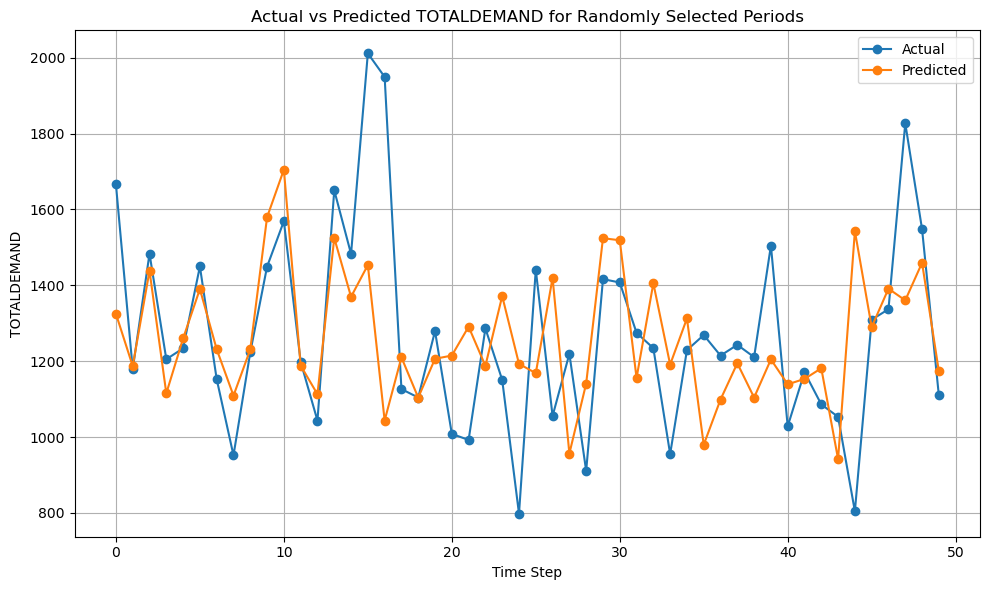

In [156]:
# plot Random Points

# Make predictions on the test data
y_pred = model.predict(X_test)

# Inverse transform the scaled predicted and actual values to their original scale
y_pred_actual = scaler_y.inverse_transform(y_pred)
y_test_actual = scaler_y.inverse_transform(y_test)

# Get the total number of periods in the dataset
total_periods = len(y_test_actual)

# Randomly select 50 periods
random_indices = np.random.choice(total_periods, size=50, replace=False)

# Extract the actual and predicted values for the randomly selected periods
random_actual = y_test_actual[random_indices]
random_predicted = y_pred_actual[random_indices]

# Plot actual vs predicted values for the randomly selected periods
plt.figure(figsize=(10, 6))
plt.plot(random_actual, label='Actual', marker='o', linestyle='-')
plt.plot(random_predicted, label='Predicted', marker='o', linestyle='-')
plt.title('Actual vs Predicted TOTALDEMAND for Randomly Selected Periods')
plt.xlabel('Time Step')
plt.ylabel('TOTALDEMAND')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



461/461 [==============================] - 0s 900us/step


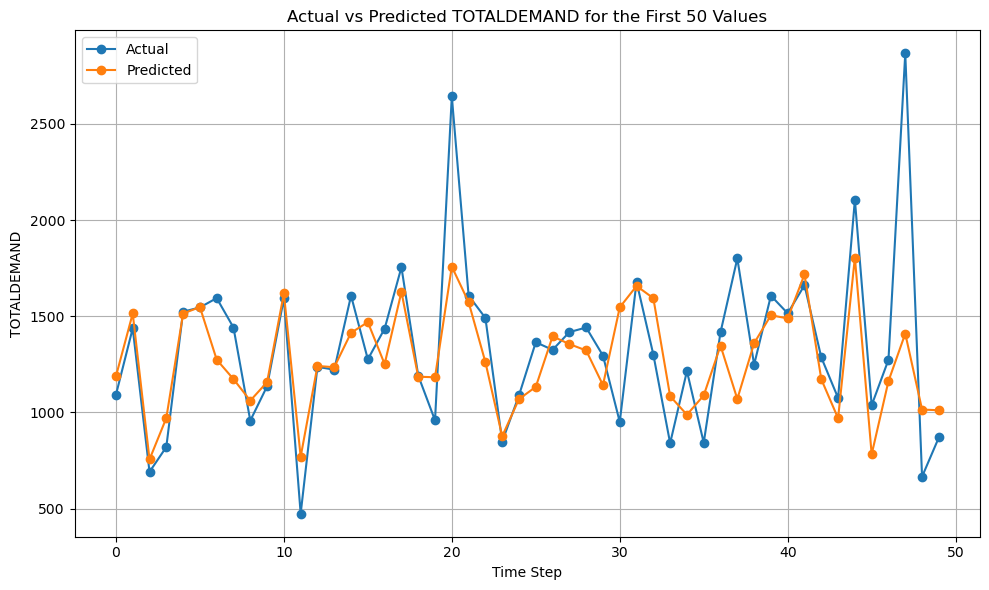

In [158]:
# Plot the first 50 results

# Make predictions on the test data
y_pred = model.predict(X_test)

# Inverse transform the scaled predicted and actual values to their original scale
y_pred_actual = scaler_y.inverse_transform(y_pred)
y_test_actual = scaler_y.inverse_transform(y_test)

# Extract the first 100 actual and predicted values
first_50_actual = y_test_actual[:50]
first_50_predicted = y_pred_actual[:50]

# Plot actual vs predicted values for the first 50 values
plt.figure(figsize=(10, 6))
plt.plot(first_50_actual, label='Actual', marker='o', linestyle='-')
plt.plot(first_50_predicted, label='Predicted', marker='o', linestyle='-')
plt.title('Actual vs Predicted TOTALDEMAND for the First 50 Values')
plt.xlabel('Time Step')
plt.ylabel('TOTALDEMAND')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()




# Note above model is struggling to predict the outlier peaks and troughs



In [ ]:
unique_months = np.unique(X_test[:, :, 1])
print("Unique months in the test dataset:", unique_months)

# Test Neural Network Model for QLD

In [249]:
column_types = qld_df.dtypes
print(column_types)

LOCATION                     object
DATETIME             datetime64[ns]
TEMPERATURE                 float64
TOTALDEMAND                 float64
REGIONID_x                   object
PREDISPATCHSEQNO              int64
REGIONID_y                   object
PERIODID                      int64
FORECASTDEMAND              float64
LASTCHANGED                  object
SEASON_INT                    int64
YEAR                          int32
DAY                           int32
HOUR                          int32
SEASON                       object
IS_PUBLIC_HOLIDAY             int32
Cooling                     float64
Heating                     float64
MONTH                         int32
WEEKDAY                       int32
dtype: object


Testing Conventional Linear Regression for QLD and VIC

In [293]:
# Extract relevant features from DATETIME column
qld_df['YEAR'] = qld_df['DATETIME'].dt.year
qld_df['MONTH'] = qld_df['DATETIME'].dt.month
qld_df['DAY'] = qld_df['DATETIME'].dt.day
qld_df['HOUR'] = qld_df['DATETIME'].dt.hour
qld_df['MINUTE'] = qld_df['DATETIME'].dt.minute


# Define categorical, numerical, and binary features
categorical_features = ['SEASON_INT']
numerical_features = ['YEAR', 'MONTH', 'DAY', 'HOUR', 'MINUTE', 'TEMPERATURE', 'Cooling', 'Heating','WEEKDAY']
binary_features = ['IS_PUBLIC_HOLIDAY','is_weekend']

# Split features and target
X = qld_df[categorical_features + numerical_features + binary_features]
y = qld_df['TOTALDEMAND']

# Define preprocessing steps for different types of features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),  # Standardize numerical features
        ('cat', OneHotEncoder(), categorical_features),  # One-hot encode categorical features
        ('bin', 'passthrough', binary_features)  # Include binary features as is
    ])

# Create a pipeline with preprocessing and linear regression model
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the pipeline (preprocessing + linear regression model) on training data
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Test MSE:", mse)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print("R^2 Score:", r2)

Test MSE: 336671.2065878094
R^2 Score: 0.5790265415666349


In [ ]:
# Neural Network Model MLPRegressor Neural Network

In [294]:
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', max_iter=2000, random_state=42))
])

X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 53408.56135966885
R^2 Score: 0.9332179695038272


Victoria

In [295]:
# Extract relevant features from DATETIME column
vic_df['YEAR'] = vic_df['DATETIME'].dt.year
vic_df['MONTH'] = vic_df['DATETIME'].dt.month
vic_df['DAY'] = vic_df['DATETIME'].dt.day
vic_df['HOUR'] = vic_df['DATETIME'].dt.hour
vic_df['MINUTE'] = vic_df['DATETIME'].dt.minute


# Define categorical, numerical, and binary features
categorical_features = ['WEEKDAY']

# Define categorical, numerical, and binary features
categorical_features = ['SEASON_INT']
numerical_features = ['YEAR', 'MONTH', 'DAY', 'HOUR','MINUTE', 'TEMPERATURE', 'Cooling', 'Heating','WEEKDAY']
binary_features = ['IS_PUBLIC_HOLIDAY','is_weekend']

# Split features and target
X = vic_df[categorical_features + numerical_features + binary_features]
y = vic_df['TOTALDEMAND']

# Define preprocessing steps for different types of features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),  # Standardize numerical features
        ('cat', OneHotEncoder(), categorical_features),  # One-hot encode categorical features
        ('bin', 'passthrough', binary_features)  # Include binary features as is
    ])

# Create a pipeline with preprocessing and linear regression model
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the pipeline (preprocessing + linear regression model) on training data
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Test MSE:", mse)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print("R^2 Score:", r2)

Test MSE: 348925.9619754081
R^2 Score: 0.5353323369920993


# LSTM Model QLD

In [298]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.callbacks import EarlyStopping

# Select features and target
X = qld_df[['YEAR', 'MONTH', 'DAY', 'HOUR', 'MINUTE', 'TEMPERATURE', 'IS_PUBLIC_HOLIDAY', 'Cooling', 'Heating', 'WEEKDAY','is_weekend']].values
y = qld_df['TOTALDEMAND'].values

# Normalize features
scaler_X = MinMaxScaler(feature_range=(0, 1))
X_scaled = scaler_X.fit_transform(X)

# Normalize target
scaler_y = MinMaxScaler(feature_range=(0, 1))
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1))

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Reshape input data for LSTM model (samples, time steps, features)
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

# Define the LSTM model
model = Sequential([
    LSTM(units=50, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dense(units=1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Define early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, callbacks=[early_stopping])

# Evaluate the model
mse = model.evaluate(X_test, y_test)
print("Test MSE:", mse)

Epoch 1/50
1660/1660 [==============================] - 4s 2ms/step - loss: 0.0112 - val_loss: 0.0093
Epoch 2/50
1660/1660 [==============================] - 3s 2ms/step - loss: 0.0091 - val_loss: 0.0086
Epoch 3/50
1660/1660 [==============================] - 3s 2ms/step - loss: 0.0085 - val_loss: 0.0083
Epoch 4/50
1660/1660 [==============================] - 3s 2ms/step - loss: 0.0083 - val_loss: 0.0084
Epoch 5/50
1660/1660 [==============================] - 3s 2ms/step - loss: 0.0082 - val_loss: 0.0081
Epoch 6/50
1660/1660 [==============================] - 3s 2ms/step - loss: 0.0081 - val_loss: 0.0081
Epoch 7/50
1660/1660 [==============================] - 3s 2ms/step - loss: 0.0080 - val_loss: 0.0081
Epoch 8/50
1660/1660 [==============================] - 3s 2ms/step - loss: 0.0079 - val_loss: 0.0083
Epoch 9/50
1660/1660 [==============================] - 3s 2ms/step - loss: 0.0077 - val_loss: 0.0077
Epoch 10/50
1660/1660 [==============================] - 3s 2ms/step - loss: 0.007

In [299]:
# Make predictions
y_pred = model.predict(X_test)

# Compute MSE
mse = mean_squared_error(y_test, y_pred)
print("Test MSE:", mse)

# Compute RMSE
rmse = np.sqrt(mse)
print("Test RMSE:", rmse)

# Compute MAE
mae = mean_absolute_error(y_test, y_pred)
print("Test MAE:", mae)

# Compute R^2
r2 = r2_score(y_test, y_pred)
print("R^2 Score:", r2)


461/461 [==============================] - 1s 877us/step
Test MSE: 0.0031148735606301393
Test RMSE: 0.055811052316097204
Test MAE: 0.04162323691298316
R^2 Score: 0.8483517294585996


#Testing With Neural Network Model - QLD

In [300]:
# Select features and target
X = qld_df[['YEAR', 'MONTH', 'DAY', 'HOUR','MINUTE', 'TEMPERATURE', 'IS_PUBLIC_HOLIDAY', 'Cooling', 'Heating', 'WEEKDAY','is_weekend']].values
y = qld_df['TOTALDEMAND'].values

# Normalize features
scaler_X = MinMaxScaler(feature_range=(0, 1))
X_scaled = scaler_X.fit_transform(X)

# Normalize target
scaler_y = MinMaxScaler(feature_range=(0, 1))
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1))

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Define the neural network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Define early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, callbacks=[early_stopping])

# Evaluate the model
mse = model.evaluate(X_test, y_test)
print("Test MSE:", mse)

Epoch 1/50
1660/1660 [==============================] - 2s 1ms/step - loss: 0.0084 - val_loss: 0.0065
Epoch 2/50
1660/1660 [==============================] - 2s 977us/step - loss: 0.0052 - val_loss: 0.0053
Epoch 3/50
1660/1660 [==============================] - 2s 1ms/step - loss: 0.0036 - val_loss: 0.0035
Epoch 4/50
1660/1660 [==============================] - 2s 995us/step - loss: 0.0030 - val_loss: 0.0030
Epoch 5/50
1660/1660 [==============================] - 2s 1ms/step - loss: 0.0027 - val_loss: 0.0030
Epoch 6/50
1660/1660 [==============================] - 2s 1ms/step - loss: 0.0024 - val_loss: 0.0024
Epoch 7/50
1660/1660 [==============================] - 2s 998us/step - loss: 0.0024 - val_loss: 0.0023
Epoch 8/50
1660/1660 [==============================] - 2s 1ms/step - loss: 0.0023 - val_loss: 0.0022
Epoch 9/50
1660/1660 [==============================] - 2s 1ms/step - loss: 0.0022 - val_loss: 0.0022
Epoch 10/50
1660/1660 [==============================] - 2s 1ms/step - loss:

In [301]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Make predictions
y_pred = model.predict(X_test)

# Compute MSE
mse = mean_squared_error(y_test, y_pred)
print("Test MSE:", mse)

# Compute RMSE
rmse = np.sqrt(mse)
print("Test RMSE:", rmse)

# Compute MAE
mae = mean_absolute_error(y_test, y_pred)
print("Test MAE:", mae)

# Compute R^2
r2 = r2_score(y_test, y_pred)
print("R^2 Score:", r2)

461/461 [==============================] - 0s 769us/step
Test MSE: 0.00216368713490762
Test RMSE: 0.046515450496664223
Test MAE: 0.03367972225648547
R^2 Score: 0.8946604394641817


# Import the data from the PV Scraper

In [234]:
solar_PV_production = pd.read_csv("C:/Users/aryan2/data/combined_df_grouped_sorted.csv")

In [237]:
qld_qld_solar_df = solar_PV_production[solar_PV_production['State'] == 'QLD']
solar_df = solar_PV_production[solar_PV_production['State'] == 'QLD']
qld_solar_df = solar_PV_production[solar_PV_production['State'] == 'QLD']

In [238]:
qld_solar_df.loc[:, 'INTERVAL_DATETIME'] = pd.to_datetime(qld_solar_df['INTERVAL_DATETIME'])

print(qld_solar_df['INTERVAL_DATETIME'].dtype)

object
